# Election Map - 2024 General Election
## Medway

### Links

Medway's Parliamentary Constituencies  
https://www.medwayelects.co.uk/?page=constituencies


### Boundary Data 2023 Review (76MB)

```
!wget -P ./data https://boundarycommissionforengland.independent.gov.uk/wp-content/uploads/2023/06/232597_2023_06_27_Final_recommendations_England_gpkg.zip
```



https://dmnfarrell.github.io/plotting/geopandas-grids

The latitude values for Medway range from 51.32 to 51.48. And the longitude values range from 0.39 to 0.72.

https://www.rowmaps.com/jsons/ME/


https://uber.github.io/h3-py/polygon_tutorial.html

https://www.data.gov.uk/dataset/1cbb67bc-b0a5-4aa0-940b-1e5568c6e109/international-territorial-levels-level-3-january-2021-names-and-codes-in-the-uk-v2

In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as cx
import numpy as np
import pandas as pd
import h3

In [2]:
medway_constituencies = {
    "Chatham and Aylesford",
    "Gillingham and Rainham",
    "Rochester and Strood"
}


<Axes: >

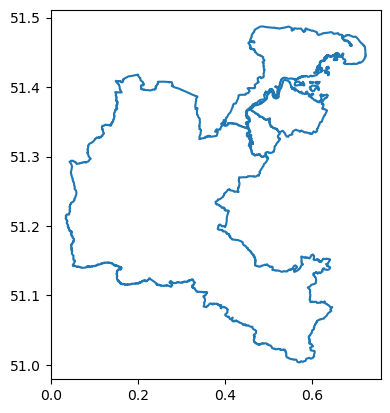

In [3]:
path_medway_physical = 'data/boundaries/International_Territorial_Level_3_January_2021_UK_BFC_V3_2022_-8261790070830609455.geojson'
gdf_medway_physical = (
    gpd.read_file(path_medway_physical)
    .loc[lambda _df: _df['ITL321NM'].isin(['Medway', 'West Kent'])]
)

gdf_medway_physical.boundary.plot()

In [4]:
list(gdf_medway_physical['ITL321NM'])

['Medway', 'West Kent']

In [5]:
# Constituencies
path_constituencies = 'data/boundaries/2023_06_27_Final_recommendations_England.gpkg'

gdf_cons = (
    gpd.read_file(path_constituencies)
    .rename(columns={'Constituen':'Constituency', 'Designatio':'Designation'})
    .to_crs(epsg=4326)
    .loc[lambda _df: _df['Constituency'].isin(medway_constituencies)]
)

gdf_cons

/opt/conda/lib/python3.12/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in '2023_06_27_Final_recommendations_England.gpkg': '2023_07_01_Final_recommendations_England' (default), '2023_06_27_Final_recommendations_England'. Specify layer parameter to avoid this warning.
  result = read_func(


,ID,Constituency,Electorate,Designation,Region,Area km2,Density,Sub region,geometry
347,350,Rochester and Strood,72155,County Constituency,South East,208.90,345.40,Kent,"MULTIPOLYGON Z (((0.42606 51.37803 0, 0.42633 ..."
348,351,Chatham and Aylesford,74840,County Constituency,South East,56.27,1330.02,Kent,"MULTIPOLYGON Z (((0.43086 51.29803 0, 0.43088 ..."
349,352,Gillingham and Rainham,73951,Borough Constituency,South East,41.80,1769.16,Kent,"MULTIPOLYGON Z (((0.63062 51.36091 0, 0.63032 ..."


In [6]:
# Wards
path_wards = 'data/boundaries/Medway_wards_2023.geojson'
gdf_wards = (
    gpd.read_file(path_wards)    
    # .to_crs(epsg=4326)
    # .loc[lambda _df: _df['Constituency'].isin(medway_constituencies)]
)

gdf_wards.head()

,OBJECTID,Name,Ward_name,No_of_coun,Current_el,Forecast_e,SHAPE_Leng,SHAPE_Area,geometry
0,1,Fort Horsted,Fort Horsted,1,3426,3653,7692.183021,2.098186e+06,"POLYGON ((0.49705 51.36034, 0.49733 51.3603, 0..."
1,2,Rainham South East,Rainham South East,3,10678,11376,11682.055510,5.605590e+06,"POLYGON ((0.61556 51.36184, 0.61655 51.36165, ..."
2,3,Lordswood & Walderslade,Lordswood & Walderslade,3,11342,11954,16858.727262,6.744457e+06,"POLYGON ((0.54855 51.36459, 0.54862 51.36453, ..."
3,4,Princes Park,Princes Park,2,6807,7085,7820.077862,1.634136e+06,"POLYGON ((0.54797 51.36585, 0.54805 51.36583, ..."
4,5,Hempstead & Wigmore,Hempstead & Wigmore,2,7628,8156,13225.376909,4.504709e+06,"POLYGON ((0.55855 51.3671, 0.55856 51.36709, 0..."


In [7]:
# Polling District
path_os = 'data/bdline_gpkg_gb/Data/bdline_gb.gpkg'
gdf_polling_districts =(
    gpd.read_file(path_os, layer='polling_districts_england')
    .loc[lambda _df: _df['Distric_Bo'] == 'Medway (B)']
    .to_crs(epsg=4326)
)

gdf_polling_districts.tail(20)

,PD_ID,County,Distric_Bo,Ward,Parish,geometry
17056,RSR8,None,Medway (B),Strood Rural Ward,Frindsbury Extra CP,"MULTIPOLYGON (((0.49016 51.42585, 0.49139 51.4..."
17057,RSR7,None,Medway (B),Strood Rural Ward,Frindsbury Extra CP,"MULTIPOLYGON (((0.49966 51.42538, 0.49977 51.4..."
17058,RSR4,None,Medway (B),Strood Rural Ward,Frindsbury Extra CP,"MULTIPOLYGON (((0.50392 51.40388, 0.50405 51.4..."
17059,RSR5,None,Medway (B),Strood Rural Ward,Frindsbury Extra CP,"MULTIPOLYGON (((0.51613 51.4051, 0.51615 51.40..."
17060,RRW2,None,Medway (B),Rochester West & Borstal Ward,None,"MULTIPOLYGON (((0.45623 51.36876, 0.45791 51.3..."
17061,RRW5,None,Medway (B),Rochester West & Borstal Ward,None,"MULTIPOLYGON (((0.48679 51.38029, 0.48718 51.3..."
17063,RRW3,None,Medway (B),Rochester West & Borstal Ward,None,"MULTIPOLYGON (((0.48942 51.3718, 0.48984 51.37..."
17064,RRW4,None,Medway (B),Rochester West & Borstal Ward,None,"MULTIPOLYGON (((0.49601 51.3774, 0.4969 51.378..."
17065,RCH3,None,Medway (B),"Cuxton, Halling & Riverside Ward",Halling CP,"MULTIPOLYGON (((0.43478 51.35693, 0.43503 51.3..."
17066,RCH4,None,Medway (B),"Cuxton, Halling & Riverside Ward",Halling CP,"MULTIPOLYGON (((0.39959 51.348, 0.39985 51.348..."


In [8]:
# gdf_polling_districts.boundary.plot()
gdf_polling_districts.head(20)

,PD_ID,County,Distric_Bo,Ward,Parish,geometry
10560,GW3,None,Medway (B),Watling Ward,None,"MULTIPOLYGON (((0.55239 51.37354, 0.55343 51.3..."
10568,GW1,None,Medway (B),Watling Ward,None,"MULTIPOLYGON (((0.55664 51.38248, 0.55691 51.3..."
10592,GGS1,None,Medway (B),Watling Ward,None,"MULTIPOLYGON (((0.55544 51.3845, 0.55581 51.38..."
16138,CLC1,None,Medway (B),Lordswood & Walderslade Ward,None,"MULTIPOLYGON (((0.53615 51.33962, 0.53618 51.3..."
16317,CLC2,None,Medway (B),Lordswood & Walderslade Ward,None,"MULTIPOLYGON (((0.53675 51.33533, 0.53677 51.3..."
16331,RRE2,None,Medway (B),Rochester East & Warren Wood Ward,None,"MULTIPOLYGON (((0.50013 51.37635, 0.50018 51.3..."
16336,RRE1,None,Medway (B),Rochester East & Warren Wood Ward,None,"MULTIPOLYGON (((0.50198 51.38199, 0.50202 51.3..."
16341,CCC1,None,Medway (B),Fort Pitt Ward,None,"MULTIPOLYGON (((0.51076 51.37913, 0.511 51.379..."
16361,CCC3,None,Medway (B),Chatham Central & Brompton Ward,None,"MULTIPOLYGON (((0.51869 51.36478, 0.5187 51.36..."
16605,CCC2,None,Medway (B),Chatham Central & Brompton Ward,None,"MULTIPOLYGON (((0.52277 51.38141, 0.52288 51.3..."


In [9]:
# Polling Stations
df_polling_stations = pd.read_csv('data/polling_stations_2024.csv')

gdf_polling_stations = gpd.GeoDataFrame(
    df_polling_stations, 
    geometry=gpd.points_from_xy(df_polling_stations['longitude'], df_polling_stations['latitude']), crs="EPSG:4326"
)
    
gdf_polling_stations

,Description of people entitled to vote,POLLING DISTRICT,POLLING STATION,STATION NO.,constituancy,latitude,longitude,geometry
0,1-1503,CCB4,"New Road school, Bryant Street, ME4 5QN",1,Chatham and Aylesford,51.378226,0.531410,POINT (0.53141 51.37823)
1,1-1195,CCB5,"Church hall, St Paul with All Saints Church, M...",2,Chatham and Aylesford,51.369392,0.532264,POINT (0.53226 51.36939)
2,1-3828,CCB6,"White Road Community Centre, Keyes Avenue, ME4...",3,Chatham and Aylesford,51.370917,0.528182,POINT (0.52818 51.37092)
3,1-542,CFH1,"Meeting Room, Rogallo Place, Pilots View, Chat...",4,Chatham and Aylesford,51.381917,0.526559,POINT (0.52656 51.38192)
4,1-2873,CFH2,"Davis Estate Community Centre, Barberry Avenue...",5,Chatham and Aylesford,51.353310,0.513821,POINT (0.51382 51.35331)
...,...,...,...,...,...,...,...,...
108,1-1586,RSR8,"Frindsbury Baptist Church, 12-14 Cooling Road,...",93,Rochester and Strood,51.406943,0.499957,POINT (0.49996 51.40694)
109,1-2361,RSW1,"St Francis of Assisi Church, Galahad Avenue, M...",94,Rochester and Strood,51.393031,0.474634,POINT (0.47463 51.39303)
110,1-1687,RSW2,"38th and 40th Strood Sea Scout Hall, Dart Clos...",95,Rochester and Strood,51.393980,0.482870,POINT (0.48287 51.39398)
111,1-2307,RSW3,"Woodside Community Centre, Chestnut Road, ME2 2LH",96,Rochester and Strood,51.390049,0.472936,POINT (0.47294 51.39005)


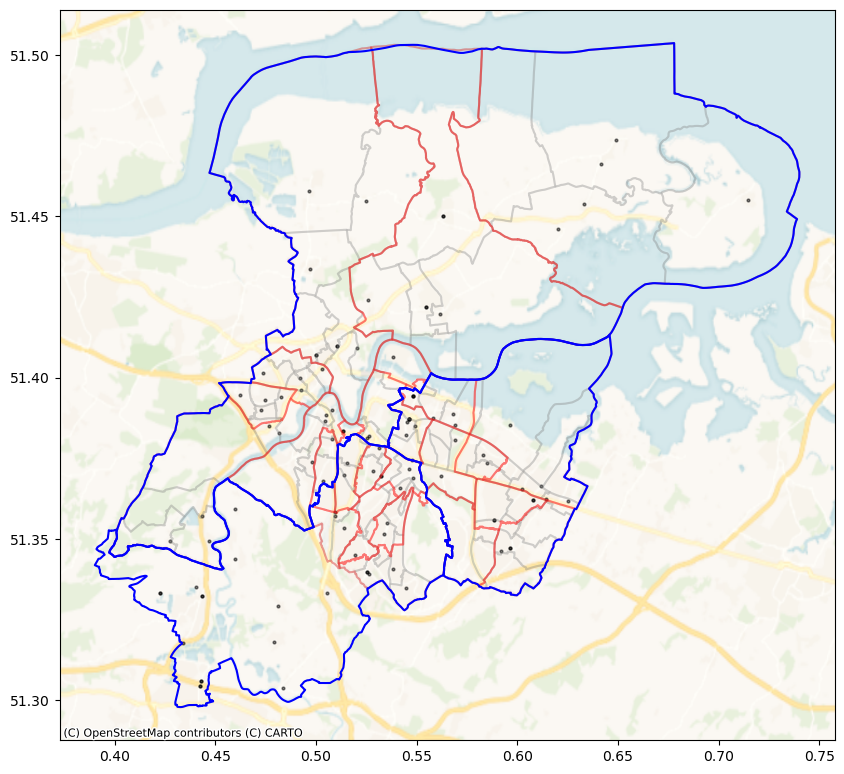

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_polling_districts.boundary.plot(ax=ax, color='grey', alpha=.2)
gdf_wards.boundary.plot(ax=ax, color='red', alpha=.3)
gdf_cons.boundary.plot(ax=ax, color='blue')


gdf_polling_stations.plot(ax=ax, color='black', markersize=4, alpha=.5)

# cx.add_basemap(ax,crs=medway_cons.crs, source=cx.providers.CartoDB.Positron)
cx.add_basemap(ax,crs=gdf_cons.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

In [11]:
# gdf_polling_stations.groupby(['POLLING STATION'])['POLLING STATION'].count().shape
gdf_polling_stations.shape

(113, 8)

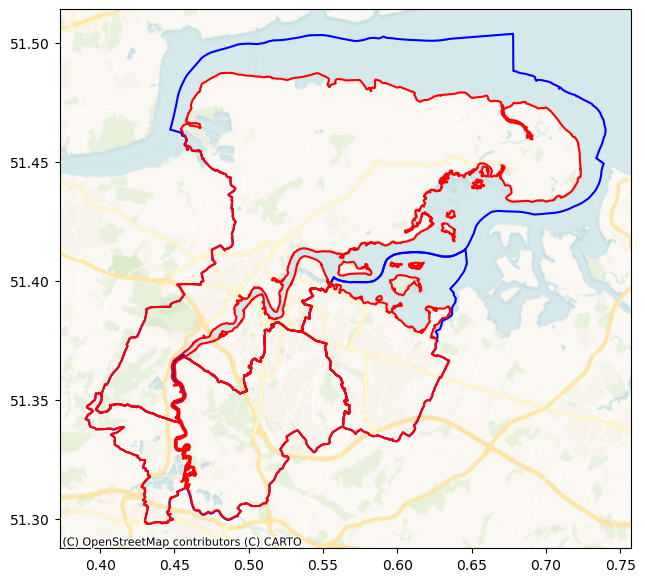

In [14]:
# Try clipping boundaries
fig,ax = plt.subplots(figsize=(14,7))
gdf_cons.boundary.plot(ax=ax, color='blue')
gdf_cons_clipped = gdf_cons.clip(gdf_medway_physical, keep_geom_type=True)
gdf_cons_clipped.boundary.plot(ax=ax, color='red')
cx.add_basemap(ax,crs=gdf_cons.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

/tmp/ipykernel_185/1841053928.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_cons_clipped.centroid.plot(ax=ax)


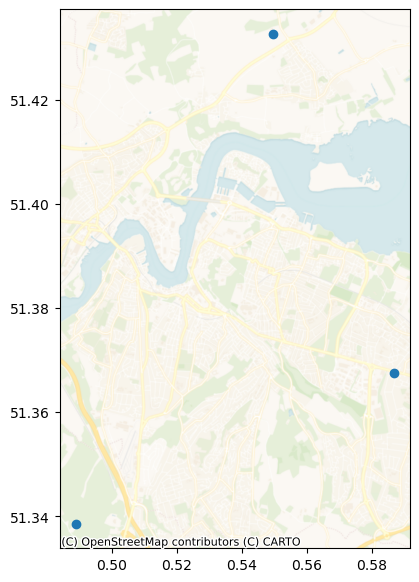

In [27]:
# Centroid plot
fig,ax = plt.subplots(figsize=(14,7))
gdf_cons_clipped.centroid.plot(ax=ax)
cx.add_basemap(ax,crs=gdf_cons.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

<Axes: >

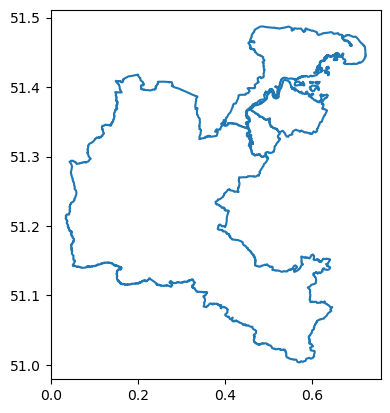

In [16]:
path_medway_physical = 'data/boundaries/International_Territorial_Level_3_January_2021_UK_BFC_V3_2022_-8261790070830609455.geojson'
gdf_medway_physical = (
    gpd.read_file(path_medway_physical)
    .loc[lambda _df: _df['ITL321NM'].isin(['Medway', 'West Kent'])]
)

gdf_medway_physical.boundary.plot()

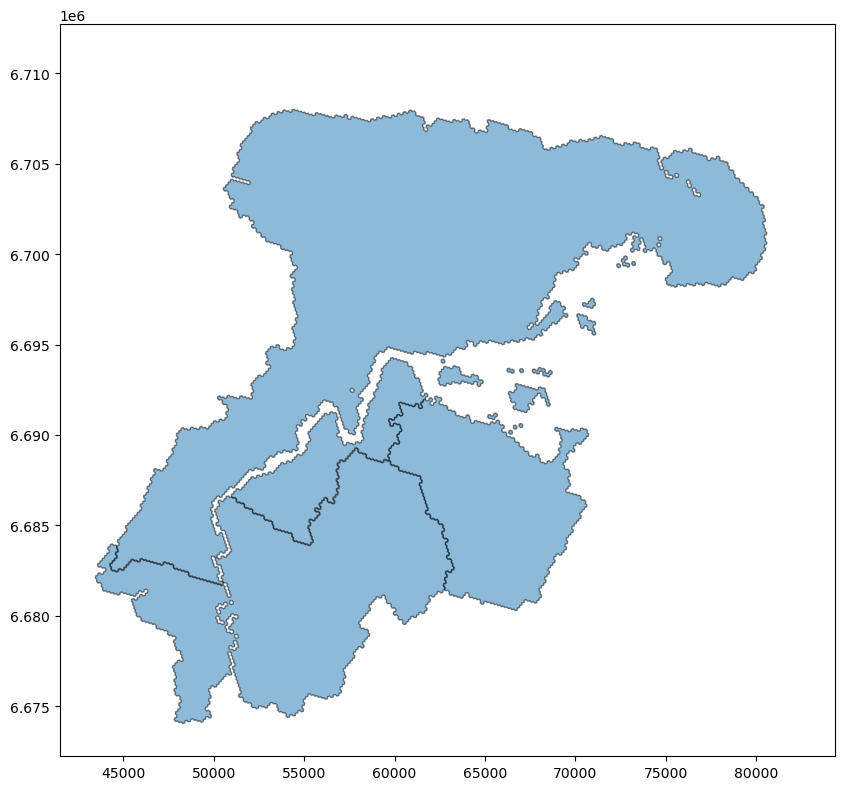

In [29]:

def plot_df(df, column=None, ax=None):
    "Plot based on the `geometry` column of a GeoPandas dataframe"
    df = df.copy()
    df = df.to_crs(epsg=3857)  # web mercator

    if ax is None:
        _, ax = plt.subplots(figsize=(8,8))
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)

    df.plot(
        ax=ax,
        alpha=0.5, edgecolor='k',
        column=column, categorical=True,
        legend=True, legend_kwds={'loc': 'upper left'},
    )
    # cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)

def plot_shape(shape, ax=None):
    df = gpd.GeoDataFrame({'geometry': [shape]}, crs='EPSG:4326')
    plot_df(df, ax=ax)

def plot_cells(cells, ax=None):
    shape = h3.cells_to_h3shape(cells)
    plot_shape(shape, ax=ax)

fig, ax = plt.subplots(figsize=(10,10))
gdf_cons.to_crs(epsg=3857).boundary.plot(ax=ax, color=None, linewidth=0)
plot_cells(h3.geo_to_cells(gdf_cons_clipped.iloc[0]['geometry'], res=10), ax=ax)
plot_cells(h3.geo_to_cells(gdf_cons_clipped.iloc[1]['geometry'], res=10), ax=ax)
plot_cells(h3.geo_to_cells(gdf_cons_clipped.iloc[2]['geometry'], res=10), ax=ax)

plt.show()


4134
